In [28]:
import re, numpy as np, pandas as pd

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
from sklearn.metrics import  confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathennavon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
fashion = pd.read_pickle('../data/fashion_clean.pkl')

### Stop Word List

In [83]:
rand_abbrev = ['tbt', 'RT', 'v5eg7nec0u','pfw', 'http', 'https', 'gt', 'gg', '2018', 'ff', 'season','2014', '2015',\
               '2016', '2017', '2013', '17', '30pm', 'cet', 'fw15','fw16', 'lfw', 've', '18', '30', 'pm', 'fw1617'\
              'pvh', 'co', 'spring2017', '15', '16' ]

top_ngram_words = ['tumblr', 'picture', 'photo', 'fe8bt2da3j', 'alberta', 'ferretti', 'christianlouboutin',\
                   'calvin', 'klein', 'alexander', 'mcqueen', 'new', 'york', 'miu', 'saint', 'laurent', 'amp',\
                  'dolce', 'gabbana', 'marc', 'jacobs', 'cdg', '3zb5zi4mdg', 'los', 'angeles', 'wears', 'balmain',\
                  'customerservice', 'derek', 'burberry', 'ow', 'ly', 'tom', 'ford', 'bonjour', 'director', 'karl',\
                  'lagerfeld', 'ad', 'uk', 'com', 'contact', 'etro', 'etroliveshow', 'mfw', 'advertising', 'jimmy',\
                  'choo', 'michael', 'kors', 'pre', 'order', 'hong','kong', 'designed', 'send', 'reminder', 'tommynow',\
                   'live', 'preview', 'limited', 'edition', '90nijepp','britishvouge', 'christian', 'dior', 'fw17',\
                  'voguemagazine', 'rt', 'giorgio', 'armani', 'riccardo', 'tisci', 'helmut', 'lang', 'allaccesskors',\
                  'coming', 'fr', 'vera', 'wang', 'usa', 'louisvuitton', 'missoni', 'lanvin', 'store', 'online',\
                   'shop', 'collection', 'years', 'aniversery', 'spring', 'fall', 'winter', 'summer',\
                 'fashion', 'discover', 'anniversery', 'runway','men', 'women', 'spring16', 'autumn', 'autumn16', 'snapchat',\
              'latest', 'issue','ceo', 'campaign', 'featuring', 'winter15', 'thanks', 'paris', 'backstage',\
              'available', 'nyfw', 'versace', 'london', 'albertaferretti', 'bulgari', 'prada', 'chloegirls',\
                   'balenciaga', 'milan', 'di', 'don', 'yvessaintlaurent', 'saintlaurent', 'ysl', 'harper', 'bazaar',\
                  'vuitton', 'louis', 'elbaz', 'alber','apologize', 'stay', 'ss18', 'givenchy', 'eq2n69pr',\
                   'alexandre', 'vauthier','oscar', 'renta','la','verawang','anthony','vaccarello', 'herve','leger',\
                  'offwht', 'virgilabloh', 'morelli', 'natacha', 'ramsay', 'sims', 'david', 'qt3ps2leo7', '7kuilnix98',\
                  'sartoria', 'alta', 'etroeditorials', 'demarchelier', 'patrick','dsevytni7x','etrowoman',\
                  'steven', 'meisel', 'availability', 'assistance', 'hugoboss', 'pierpaolopiccioli','panosyiapanis',\
                   'burberryshow','mother','day', 'twnghesquiere', 'julianne', 'moore', 'christopher','bailey',\
                  'wore','sir', 'mccullin', 'direct', 'cannes', 'film', 'michelle', 'williams', 'palais','domenico',\
                   'stefano', 'vanity', 'fair','jennifer', 'lawrence', 'paulhanlonhair', 'serpenti', 'says',\
                  'juergen','hugo', 'instagram', 'stories','tomford', 'tomfordfw18', 'sorry', 'customer', 'regards',\
                  'better', 'sincerely', 'team', 'regard', 'alasdair', 'mclellan', 'robertocavalliss16', 'peterdundas',\
                  'wearing', 'grazia', 'chiuri', 'maria', 'balmainss17', 'valentino', 'kate', 'moss', 'williams'\
                  'paulhanlonhair', 'got','dgalteartigianalità', 'jessica', 'chastain', 'amfar', 'frances', 'bean',\
                   'cobain','pleased', 'announce', 'shayne', 'oliver', 'womenswear', 'email',\
                   'calvinkleincustomerservicedinner','bruce','weber','clare','francisco', 'costa',\
                   'waight', 'keller', 'tommyfall15', 'twittermirror', 'maison', 'goyard', 'calvinkleincustomerservice',\
                   'adwoa', 'aboah','artigianatoitaliano','karlism', 'karllagerfeld', 'roberto',\
                   'cavalli', 'balmainarmy' 'thisisboss' , 'mycalvins' ,'versacecelebrities', 'dkny', 'dgwomen', 'pradacelebs',\
                  'dgw1rozklu', 'mrkimjones', 'beautelouboutin', 'nfzzomr0ld', 'dxecfmdzz1', '3rxpsl4nwr', 'bosssports',\
                  'calvinkleinlive','willy', 'vanderperre','opening', 'night','cate', 'blanchett','press', 'conference',\
                   'sofia', 'coppola', 'direction', 'pierpaolo', 'piccioli', 'vogue', 'china', 'fw2013', 'fashionshow',\
                  'oscardelarenta', 'nicole', 'kidman', 'peter', 'dundas', 'sale', 'natalie', 'portman', 'video',\
                  'beverly', 'awards', 'academy', 'hedi', 'slimane', 'directors', 'limitededition2013', 'losangeles',\
                  'naomi', 'watts', 'regent', 'capsule', 'marion', 'cotillard', 'mikael', 'jansson', 'cny2018',\
                   'cocomademoiselle', 'charlène', 'mercedesamgf1', 'lewishamilton', 'chloé',\
                   'chloefashion', 'bvqx5ipzwt', 'miumiusic', 'app', 'mjresort18', 'wywukpnwm4', 'palermo',\
                   'moda', 'tokyo', 'national', 'museum', '2010', '2011', 'menswear', 'thisisboss', 'nyfwm',\
                  'invitedbychloe', 'april', '13th', 'missoniwomen', 'diortokyo', 'looking', 'great',\
                   'dannysangra', 'nowthendannysangra', 'marco', 'bizzarri', 'make', 'feel', 'daisytime',\
                   'lucasossendrijver', 'lanvinhomme', 'giorgioarmani',  'womenstales', 'brigitte', 'lacomb',\
                   'chapter', 'soon','movies', 'series', 'starring',  'posted', 'facebook', 'cl', 'website',\
                   'city', 'historic', 'chiara' 'invitedbychloe', 'japan', '121', 'street', 'rosie', 'marks',\
                   'british', 'actor', 'kris', 'wu', 'actress', 'mariotestino', 'zhou', 'dongyu',\
                   'thedk88', 'february','burberryphotoseries', 'old', 'sessions', 'house', 'bafta', 'breakthroughbrits',\
                   'portfolio', 'images', 'september', 'thetaleofthomasburberry', 'pzm6xhskwb', 'lily', 'james',\
                  'applemusic', '20', 'gmt', 'christmas', '12', 'select', 'retailers', 'stores', 'seen', 'ethan', 'green',\
                  'wrnhacpo2m', 'walter', 'pfeiffer', 'totcihvkix', '25', 'carine', 'roitfeld', 'mario', 'sorrenti',\
                   'west', 'hollywood','look', '28', '29', '13', 'qt3ps33fff', 'fashionsinner', 'lamodaèbellezza',\
                   'explore', 'starting', 'tomorrow', 'june']

top_gucci_ngram_words = ['alessandromichele', 'lacma', 'guccifw17', 'guccicruise', 'guccigw16', 'gucciace',\
                         'guccigift', 'gucci', 'guccicruise17', 'guccicruise18', 'guccifw16', 'gucciss17',\
                         'gucciss18', 'gucciprefall17', 'ignasimonreal', 'gucciss16', 'gucciprefall16',\
                         'guccigarden', 'christophersimmonds', 'guccisylvie','5m6clpovyv','0ltshooxyh',\
                         'guccigram', 'eltonofficial', 'guccidionysus', 'sponsored', 'raf', 'simons',\
                         'zzzkpmjd', 'artandfilm'] 
top_mcqueen_ngram_words = ['mcqueenss', 'alexandermcqueen', 'mcq', 'worldmcqueen', 'aw12', 'aw16', 'lcm', 'aw14',\
                          'ss15', 'aw13', 'ss14', 'ss17', 'ss16','mcqueenss18',\
                           'e2rmxkbjro', 'mmparisdotcom', 'burton', 'sarah', 'aw15', 'masha', 'vasyukova',\
                           'jamiehawkesworth', 'photographed', 'fngm2n7lsw']
top_stella_ngram_words = ['stellamccartney', 'stella', 'mccartney', 'adidas', 'addidaswomens' 'stellasworld',\
                          'stella_kids', 'stellasworld', 'stellamenswear', 'birthday','happy', 'stellastar',\
                         'philippa', 'price']



additional_stop_words = rand_abbrev+top_ngram_words+top_gucci_ngram_words + top_mcqueen_ngram_words + top_stella_ngram_words

#sorted(additional_stop_words)
#pd.DataFrame(additional_stop_words)[pd.DataFrame(additional_stop_words).duplicated()]

In [79]:
with open('../data/stop_words.txt') as addit_stop:
    additional_stop_words = addit_stop.read() 

In [84]:
#NLTK stop words
stop = stopwords.words('english')
stop.extend(additional_stop_words)

#sklearn stop words
stop_words = list(ENGLISH_STOP_WORDS)
stop_words.extend(additional_stop_words)

In [85]:
#vectorizing words
vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,4), min_df=0.0001)
#vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,7), max_df=.2, min_df=.0001)
X = vect.fit_transform(fashion.text)

In [86]:
all_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
all_text.index = fashion.index
all_text.shape

(113868, 3163)

In [87]:
#pd.set_option('display.max_columns', len(all_text.columns))
#all_text.head()

In [40]:
all_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113868 entries, Acne Studios to Saint Laurent
Columns: 3163 entries, 10 crosby to 코어스에서는 가죽을 제품 제작에
dtypes: int64(3163)
memory usage: 2.7+ GB


In [41]:
all_text.sum().sort_values(ascending=False).head(50)

red carpet                     650
haute couture                  509
ready wear                     291
black white                    250
play swag                      244
trench coat                    217
sneak peek                     178
white titled                   159
mini dress                     159
bomber jacket                  153
getting ready                  147
head toe                       143
leather jacket                 130
message details                116
chiffon dress                  116
lace dress                     114
just arrived                   110
assist kind                    110
black leather                  107
perfect gift                   107
gift guide                     102
cover story                    102
evening dress                  101
just hit                        99
styled hair                     95
good morning                    94
shoulder bag                    93
dress featured                  92
silk dress          

In [101]:
overall_ng         = all_text.sum().sort_values(ascending=False)[5:40]
gucci_ng           = all_text[all_text.index == "gucci"].sum().sort_values(ascending=False).head(25)
mcqueen_ng         = all_text[all_text.index == "Alexander McQueen"].sum().sort_values(ascending=False).head(25)
stellamccartney_ng = all_text[all_text.index == "Stella McCartney"].sum().sort_values(ascending=False).head(25)
burberry_ng        = all_text[all_text.index == "Burberry"].sum().sort_values(ascending=False).head(25)

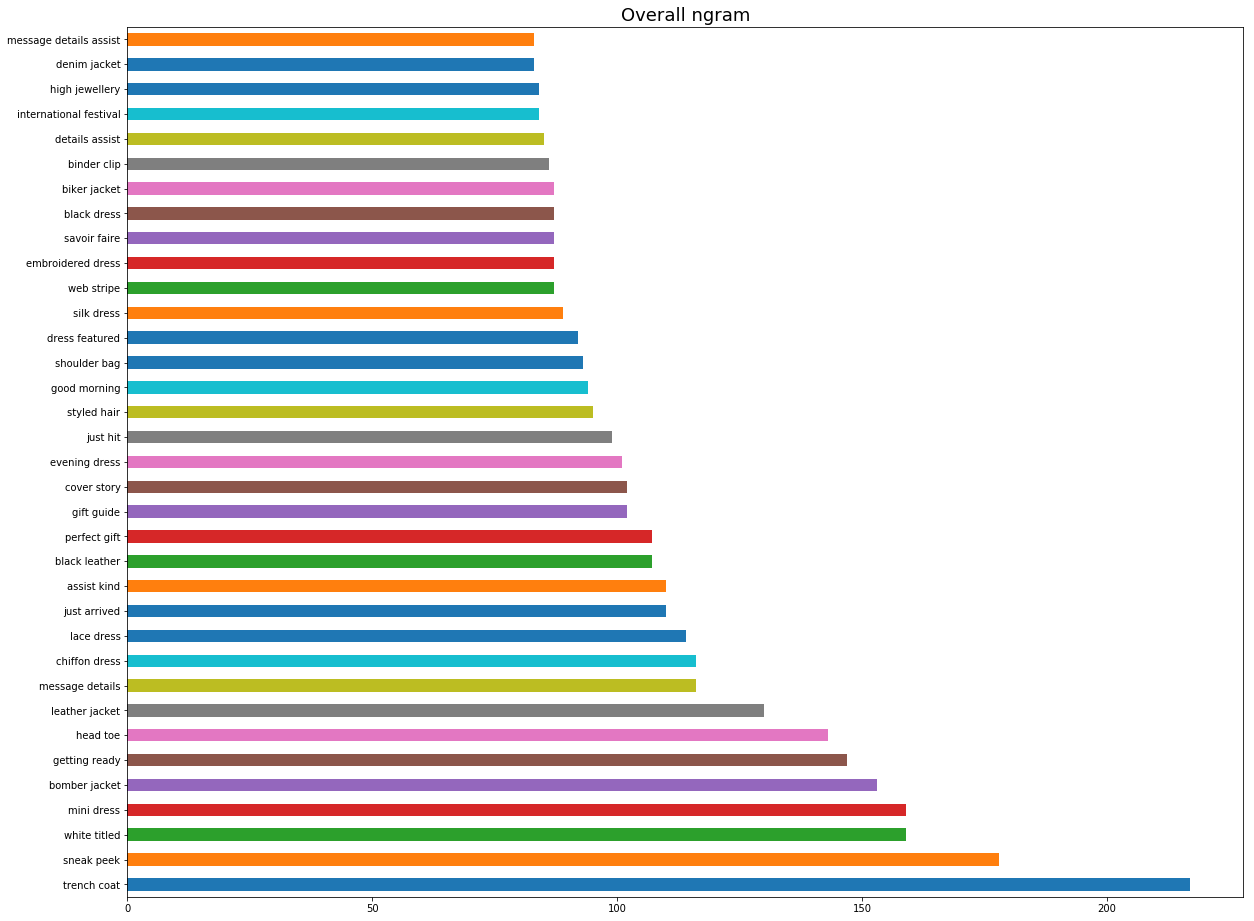

In [102]:
plt.title('Overall ngram', fontsize=18)
overall_ng.plot(kind='barh', figsize=(20,16));
plt.savefig('../visuals/overall_ngram.jpg')

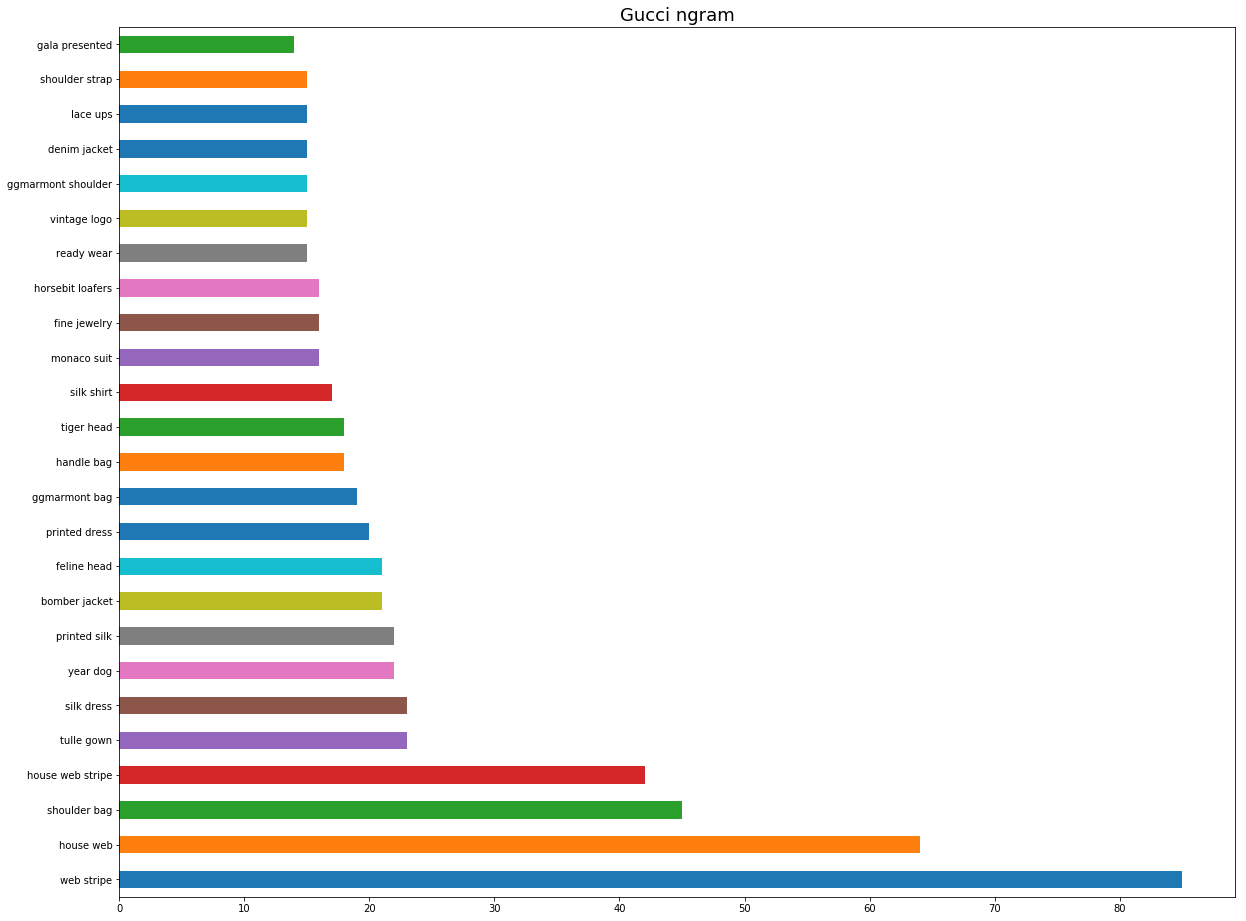

In [15]:
plt.title('Gucci ngram', fontsize=18)
gucci_ng.plot(kind='barh', figsize=(20,16));
plt.savefig('../visuals/gucci_ngram.jpg')

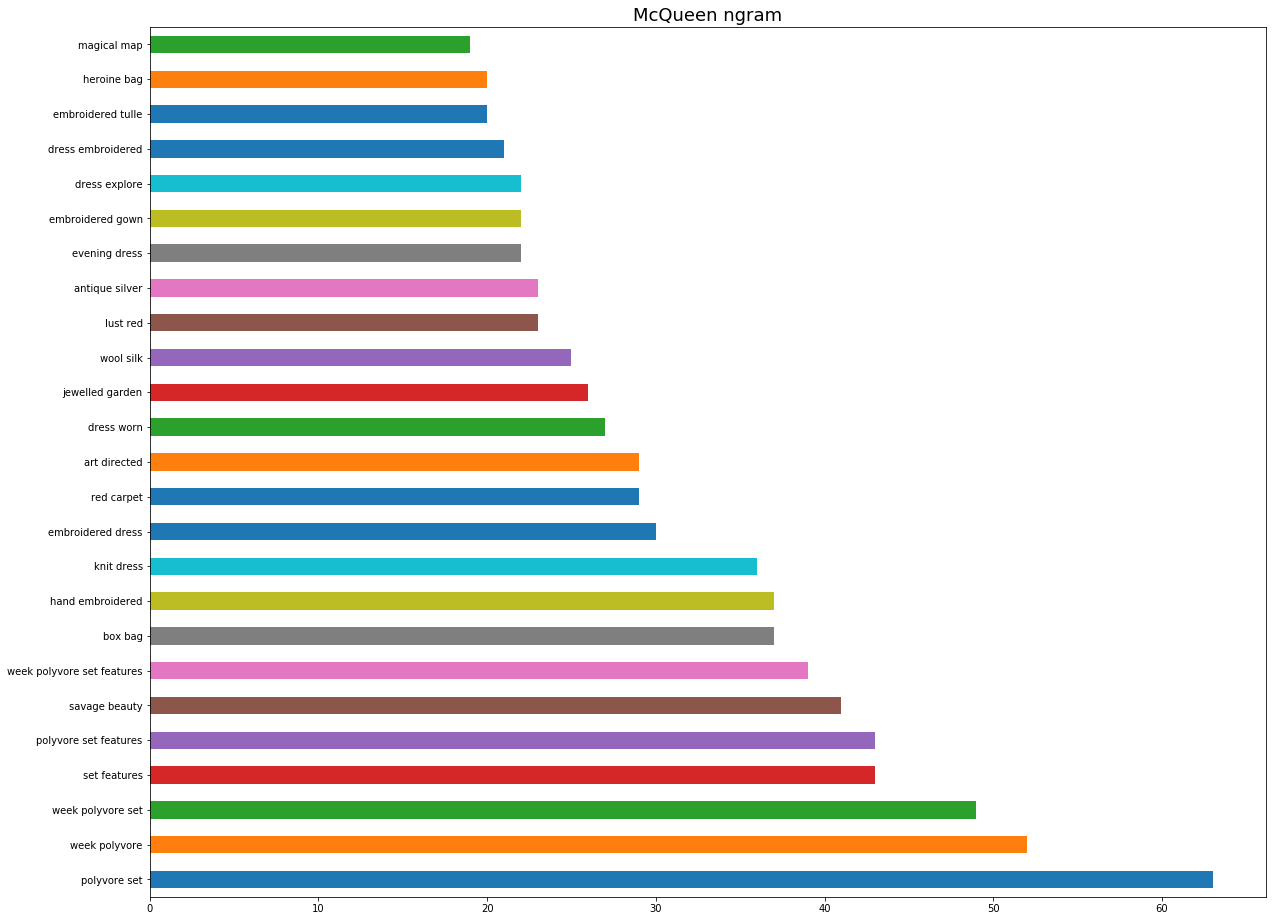

In [16]:
plt.title('McQueen ngram', fontsize=18)
mcqueen_ng.plot(kind='barh', figsize=(20,16));
plt.savefig('../visuals/mcqueen_ngram.jpg')

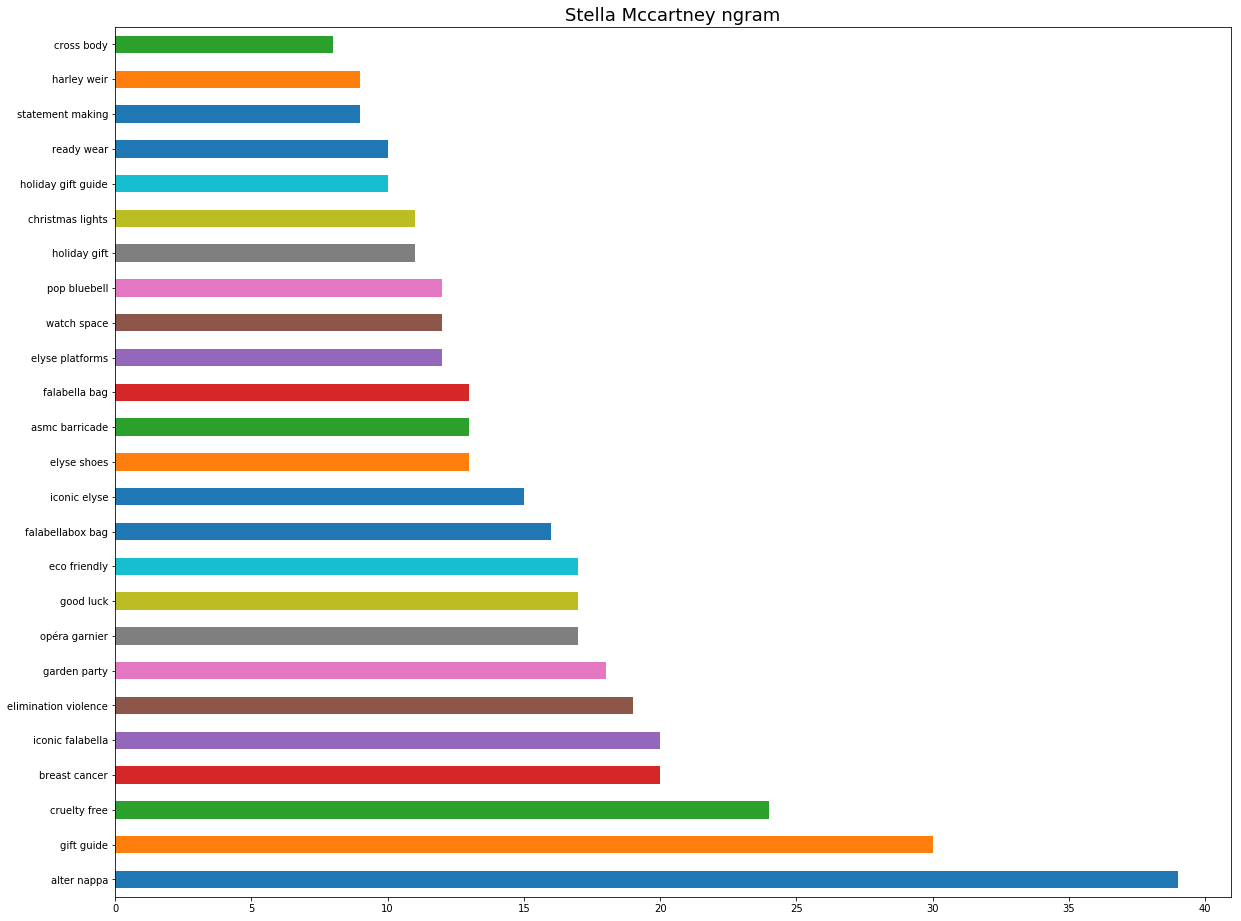

In [17]:
plt.title('Stella Mccartney ngram', fontsize=18)
stellamccartney_ng.plot(kind='barh', figsize=(20,16));
plt.savefig('../visuals/Stella_Mccartney_ngram.jpg')

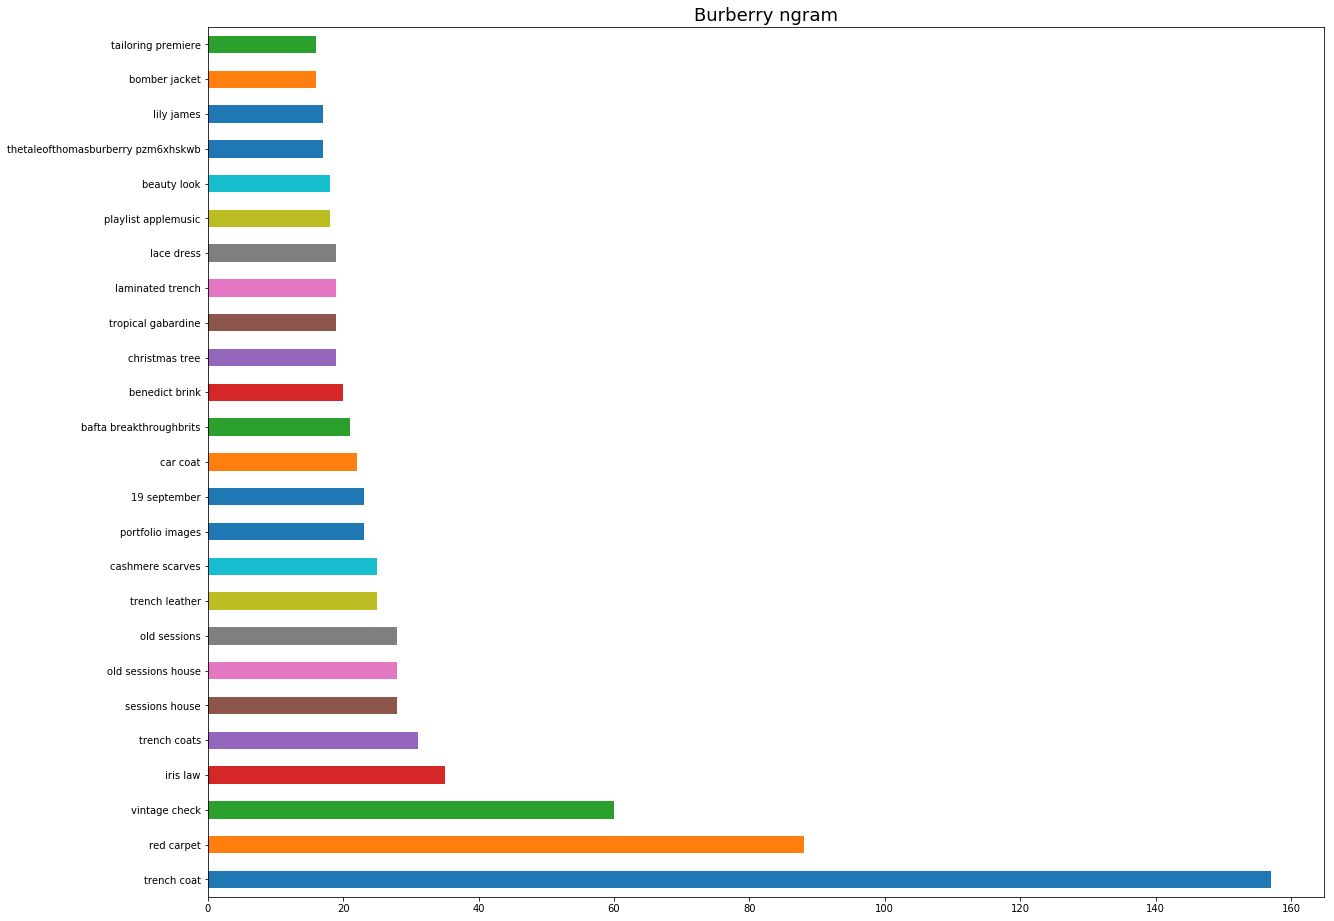

In [18]:
plt.title('Burberry ngram', fontsize=18)
#plt.xlabel('')
#plt.ylabel('')
burberry_ng.plot(kind='barh', figsize=(20,16));
plt.savefig('../visuals/Burberry_ngram.jpg')

### Modeling 

In [107]:
nbayes_b = BernoulliNB()
nbayes_m = MultinomialNB()
logreg  = LogisticRegression()

rf = RandomForestClassifier(max_depth=3)
tree = ExtraTreesClassifier(max_depth=3)
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()

# fitting model
model = nbayes_m.fit(all_text, all_text.index)

In [108]:
# Prep our source as TfIdf vectors
source_test = [
    "soft tulle short sleeve gown with layered plissé bell sleeves and velvet contrast belt", #gucci
    "chemisier dresses with brocade and animal print skirts", #prada
    "Chelsea trench coat with a check jumpsuit and reissued cardigan", #burberry
]

### Check this against your already fit model and fit vectorizer
X_source = vect.transform(source_test)
predicted = model.predict(X_source.toarray())
predicted_probas = model.predict_proba(X_source.toarray())
print(predicted)
pd.DataFrame(predicted_probas,columns=fashion.index.unique()).T

['Roberto Cavalli' 'Stella McCartney' 'Burberry']


,0,1,2
handle,,,
Acne Studios,0.008782,0.008039,0.005349
Akris,0.008765,0.007667,0.001701
AlbertaFerretti,0.028287,0.021011,0.013982
Alexandre Vauthier,0.028182,0.015468,0.041172
Balenciaga,0.006516,0.006358,0.001410
Balmain,0.010565,0.008141,0.001806
Bulgari,0.028138,0.019378,0.004298
Burberry,0.025055,0.015036,0.003335
CALVIN KLEIN,0.028243,0.035256,0.617794


In [46]:
predicted = model.predict(all_text)
probas    = model.predict_proba(all_text)

In [47]:
fashion['predicted'] = predicted

In [48]:
fashion['predicted']

handle
Acne Studios          Acne Studios
Acne Studios          Acne Studios
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios          Acne Studios
Acne Studios          Acne Studios
Acne Studios                 gucci
Acne Studios     Oscar de la Renta
Acne Studios     Alexander McQueen
Acne Studios     Oscar de la Renta
Acne Studios          Acne Studios
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios          CALVIN KLEIN
Acne Studios     Oscar de la Renta
Acne Studios                 gucci
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios           Marc Jacobs
Acne Studios     Oscar de la Renta
Acne Studios     Oscar de la Renta
Acne Studios          Acne Studios
Acne Studios          Acne Studios
Acne Studios     Oscar de la Renta
Acne Studios              Burberry
Acne Studios 

In [62]:
confusion_matrix(fashion.index, fashion.predicted)

array([[190,   0,   5, ...,  10,   0,  25],
       [  1, 254,   7, ...,   3,   3,   8],
       [  0,   0, 548, ...,  25,   5,  17],
       ...,
       [  0,   1,  36, ..., 759,   3,  47],
       [  3,   0,  22, ...,  14, 639,  11],
       [  3,   0,  12, ...,  39,   6, 827]])

In [23]:
for fashion_index, label in enumerate(model.classes_):
    fashion['%s-proba' % label] = np.round(probas[:, fashion_index], 4)

In [24]:
# prada styled info tweeted by gucci 

fashion[fashion.index == 'gucci'].sort_values("PRADA-proba", ascending=False).head(10)

,created,text,tweet_id,clean,predicted,Acne Studios-proba,Akris-proba,AlbertaFerretti-proba,Alexander McQueen-proba,Alexandre Vauthier-proba,...,PRADA-proba,Roberto Cavalli-proba,Saint Laurent-proba,Stella McCartney-proba,TOM FORD-proba,Tommy Hilfiger-proba,VERSACE-proba,Valentino-proba,Vera Wang-proba,gucci-proba
handle,,,,,,,,,,,,,,,,,,,,,
gucci,2017-12-08 19:01:13,Looking at the custom @cococapitan mural that ...,9.392083e+17,looking at the custom mural that flanks the fa...,PRADA,0.0048,0.0272,0.0121,0.0108,0.0043,...,0.3728,0.0101,0.0045,0.0127,0.0275,0.0124,0.0117,0.0111,0.0196,0.0421
gucci,2016-02-14 22:43:11,Jack O’Connell wore a #Gucci Made to Order one...,6.990010e+17,jack o connell wore a gucci made to order one ...,PRADA,0.0057,0.0058,0.0178,0.0308,0.0051,...,0.3638,0.0152,0.0056,0.0189,0.0060,0.0185,0.0160,0.0162,0.0173,0.0317
gucci,2017-02-13 15:18:04,Winner of ‘Best R&amp;B Performance’ at the #G...,8.311605e+17,winner of best r amp b performance at the gram...,PRADA,0.0064,0.0065,0.0187,0.0121,0.0058,...,0.1735,0.0153,0.0049,0.0205,0.0056,0.0205,0.0159,0.0302,0.0365,0.0841
gucci,2017-01-09 17:30:42,"Winner for Best Series, Comedy or Musical for ...",8.185103e+17,winner for best series comedy or musical for a...,PRADA,0.0064,0.0065,0.0187,0.0121,0.0058,...,0.1735,0.0153,0.0049,0.0205,0.0056,0.0205,0.0159,0.0302,0.0365,0.0841
gucci,2017-01-09 11:30:20,Winner for Best Actor Comedy or Musical at the...,8.184196e+17,winner for best actor comedy or musical at the...,PRADA,0.0064,0.0065,0.0187,0.0121,0.0058,...,0.1735,0.0153,0.0049,0.0205,0.0056,0.0205,0.0159,0.0302,0.0365,0.0841
gucci,2016-05-17 16:17:34,Singer actress #Soko wore a #GucciSS16 lace an...,7.326060e+17,singer actress soko wore a gucciss16 lace and ...,PRADA,0.0061,0.0062,0.0174,0.0152,0.0054,...,0.1675,0.0523,0.0060,0.0202,0.0064,0.0198,0.0163,0.0327,0.0186,0.0317
gucci,2017-10-10 08:47:30,To the International Premiere of 'Thoroughbred...,9.176729e+17,to the international premiere of thoroughbreds...,gucci,0.0051,0.0059,0.0282,0.0191,0.0052,...,0.1662,0.0085,0.0058,0.0169,0.0057,0.0171,0.0126,0.0126,0.0144,0.1815
gucci,2017-09-04 19:30:18,"At the 74th #VeniceFilmFestival, master of cer...",9.047887e+17,at the 74th venicefilmfestival master of cerem...,gucci,0.0042,0.0050,0.0129,0.0211,0.0044,...,0.1648,0.0105,0.0044,0.0139,0.0044,0.0124,0.0155,0.0352,0.0125,0.2905
gucci,2017-02-10 15:29:11,To the premiere of “Django” at the 67th @Berli...,8.300762e+17,to the premiere of django at the 67th film fes...,PRADA,0.0067,0.0069,0.0466,0.0152,0.0061,...,0.1528,0.0517,0.0067,0.0229,0.0069,0.0223,0.0315,0.0378,0.0206,0.0394


In [49]:
from sklearn.metrics import classification_report

print(classification_report(fashion.index, fashion['predicted']))

                     precision    recall  f1-score   support

       Acne Studios       0.79      0.19      0.31      1000
              Akris       0.93      0.25      0.40       998
    AlbertaFerretti       0.53      0.17      0.26      3221
  Alexander McQueen       0.55      0.33      0.42      3209
 Alexandre Vauthier       0.53      0.11      0.18       742
         Balenciaga       0.88      0.20      0.32      1203
            Balmain       0.70      0.25      0.36      3204
            Bulgari       0.76      0.32      0.45      2853
           Burberry       0.57      0.32      0.41      3216
       CALVIN KLEIN       0.64      0.20      0.31      3225
             CHANEL       0.76      0.37      0.50      1819
  COMME des GARÇONS       0.99      0.13      0.23      3219
              Chloé       0.70      0.27      0.39      2813
Christian Louboutin       0.66      0.13      0.22      3204
               DKNY       0.84      0.12      0.22      1278
          Derek Lam    

/anaconda2/envs/dsi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
model.score(all_text, all_text.index)

0.24563529701057366